In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname = []
for j in range(3):
    fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
    alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))


In [8]:
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[21]
print(dat.keys())
print("Number of neurons: {}\nNumber of trials: {}\nNumber of timesteps: {}".format(*dat['spks'].shape))
print("Recorded brain areas:", *["{} ({}),".format(*elem) for elem in zip(*np.unique(dat['brain_area'], return_counts=True))])

dat['mouse_name']

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])
Number of neurons: 646
Number of trials: 444
Number of timesteps: 250
Recorded brain areas: ACA (32), ACB (92), IC (58), MOs (65), MRN (112), PL (48), RSP (82), SCsg (14), TT (10), VISp (133),


'Muller'

Mouse 0 has 178 recorded neurons in VISp (correlates with action but not choice).

In [14]:
dt = 0.01 # bin duration (ms)
t = np.arange(dat['spks'].shape[2])*dt
t -= 0.5 # set timestep 0 to stimulus onset 


## Single-trial analysis

In [12]:
def print_trial_outcome(dat, trial_idx):
    if dat['contrast_left'][trial_idx] != 0 and dat['contrast_right'][trial_idx] != 0:
        stimulus = "Both" 
    elif dat['contrast_left'][trial_idx] != 0.0:
        stimulus = "Left"
    elif dat['contrast_right'][trial_idx] != 0.0:
        stimulus = "Right"
    else:
        stimulus = "Neither"
    
    response = ["Right", "NoGo", "Left"][int(dat['response'][trial_idx]+1)]
    
    feedback = "Reward" if dat['feedback_type'][trial_idx] == 1 else "White noise"
    
    print("-------- Trial number {} --------".format(trial_idx))
    print("Stimulus:", stimulus)
    print("Response:", response)
    print("Feedback:", feedback)

-------- Trial number 100 --------
Stimulus: Neither
Response: NoGo
Feedback: Reward


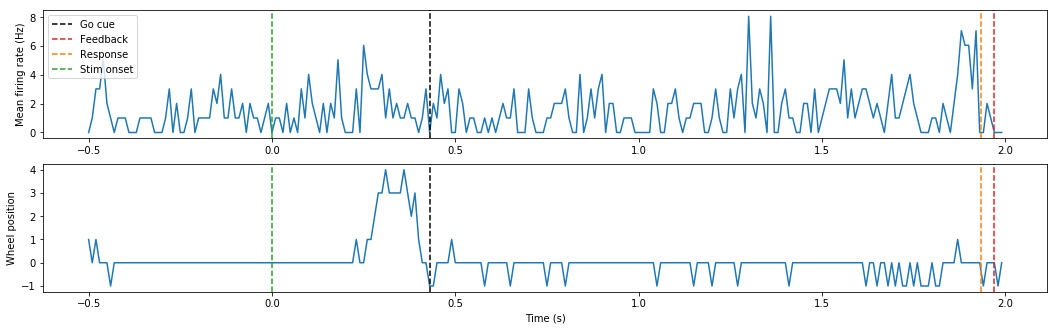

In [15]:
# trial_idx = 112
trial_idx = 100

brain_area = 'CA1'

print_trial_outcome(dat, trial_idx)
# print(dat['gocue'][trial_idx,0]) # less than 0.5s ???

neur_spks = dat['spks'][dat['brain_area'] == brain_area, trial_idx].mean(axis=0) # mean neural activity


plt.figure(figsize=[18,8])
    
# plot mean firing rate
plt.subplot(3, 1, 1)
plt.plot(t, 1/dt*neur_spks)

plot_vlines(label=True)
    
plt.ylabel("Mean firing rate (Hz)")
plt.legend()

# # plot local field potential
# plt.subplot(3, 1, 2)
# plt.plot(t, dat['lfp'][dat['brain_area_lfp'].index(brain_area), trial_idx])
# plot_vlines()
# plt.ylabel("LFP")


# plot wheel position
plt.subplot(3, 1, 2)
plt.plot(t, dat['wheel'][0,trial_idx])

plot_vlines()
plt.xlabel("Time (s)")
plt.ylabel("Wheel position")
plt.show()

In [16]:
dat['gocue'][dat['gocue']<0.5]

array([0.46913144, 0.41347576, 0.4981781 , 0.41305585, 0.42861588,
       0.41324946, 0.40798559, 0.46856602, 0.39824857, 0.41280607,
       0.4976063 , 0.46817491, 0.49760987, 0.42809808, 0.41234118,
       0.48740323, 0.49723745, 0.46776314, 0.4976946 , 0.4216607 ,
       0.43755831, 0.42789576, 0.45724607, 0.40722324, 0.46608392,
       0.43177313, 0.40160864, 0.41701791, 0.47170033, 0.47249116,
       0.41173175, 0.4322694 , 0.46223001, 0.47235413, 0.43183035,
       0.49118203, 0.46606152, 0.42133607, 0.42699751, 0.46709367,
       0.41150226, 0.47210701, 0.42584807, 0.46622463, 0.49698333,
       0.45614421, 0.46190463, 0.44452533, 0.46133621, 0.43121043,
       0.4855737 , 0.46074993, 0.4430913 , 0.43122173, 0.44126709,
       0.42119027, 0.47148842, 0.4068038 , 0.4666457 , 0.49644085,
       0.46082833, 0.41125402, 0.40117847, 0.4304432 , 0.42588531,
       0.42820671, 0.42088477, 0.4753562 , 0.41589875, 0.49061504,
       0.49096029, 0.4755757 , 0.49468574])

Problem trial 112 

Right movement = decrease wheel position, left movement = increase wheel position

Can observe the sharp wave ripples with this bin duration ?
Ripples of high freq in CA1 and not in other areas ?

### Single-neuron

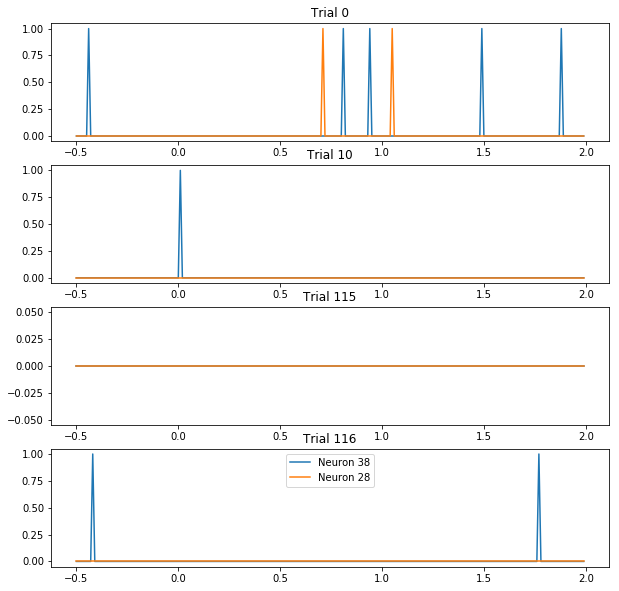

In [18]:
brain_area = "SCm"
spks = dat['spks'][dat['brain_area'] == brain_area]
neurons = [38, 28]

trials = [0, 10, 115, 116]
plt.figure(figsize=[10, 10])
for i, trial in enumerate(trials):
    plt.subplot(len(trials), 1, i+1)
    plt.plot(t, spks[neurons[0],trial], label="Neuron {}".format(neurons[0]))
    plt.plot(t, spks[neurons[1],trial], label="Neuron {}".format(neurons[1]))
    
#     plt.plot(t, dat['pupil'][1,trial], label="Horizontal")
#     plt.plot(t, dat['pupil'][2,trial], label="Vertical")
    
    plt.title("Trial {}".format(trial))

plt.legend()
plt.show()

## Trial average analysis

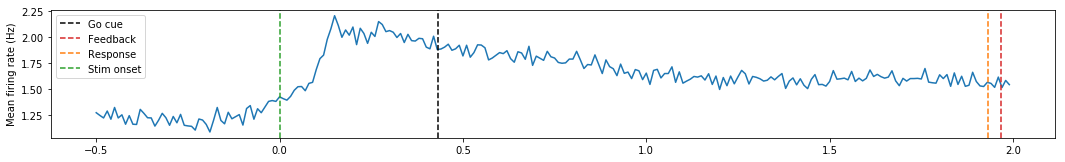

In [20]:
# brain_area = "VISp"
brain_area = "MOs"
neur_spks_avg = dat['spks'][dat['brain_area'] == brain_area].mean(axis=(0,1)) # mean neural activity averaged over trials

plt.figure(figsize=[18,8])

# plot mean firing rate
plt.subplot(3, 1, 1)
plt.plot(t, 1/dt*neur_spks_avg)

plot_vlines(label=True)
    
plt.ylabel("Mean firing rate (Hz)")
plt.legend()

# plot local field potential
# plt.subplot(3, 1, 2)
# plt.plot(t, dat['lfp'][dat['brain_area_lfp'].index(brain_area)].mean(axis=0))
# # plt.plot(t, dat['lfp'][dat['brain_area_lfp'].index(brain_area)][0])

# plot_vlines()
# plt.ylabel("LFP")

# plt.subplot(3, 1, 3)
# # plt.plot(t, dat['lfp_passive'][dat['brain_area_lfp'].index(brain_area)].mean(axis=0))
# plt.plot(t, dat['lfp_passive'][dat['brain_area_lfp'].index(brain_area)][0])

# plot_vlines()
# plt.ylabel("LFP passive")
# plt.show()

# print(dat['lfp'].shape)
# print(dat['lfp_passive'].shape)

## Principal Components Analysis

In [21]:
from sklearn.decomposition import PCA 

def compute_pca(brain_area, average=True, n_components=2):
    spks = dat['spks'][dat['brain_area'] == brain_area]
    
    if average:
        # average along the time axis
        mean_spks= spks.mean(axis=-1)
        X = mean_spks.reshape(mean_spks.shape[0], -1).T # n_samples x n_features
    else:
        X = spks.reshape(spks.shape[0], -1).T
        
    # substract the mean
    X = X - X.mean(axis=0)

    pca = PCA(n_components=n_components)
    proj_X = pca.fit_transform(X)

#     print("Explained variance ratio:", pca.explained_variance_ratio_)
#     print(proj_X.shape)
    return proj_X, pca.explained_variance_ratio_

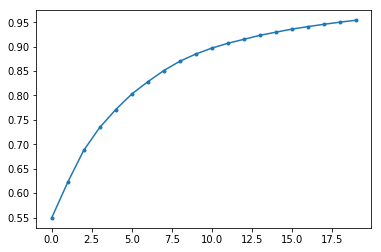

In [22]:
max_comp = 20
proj_data, explained_var = compute_pca('CA1', n_components=max_comp)
plt.plot(np.arange(max_comp), np.cumsum(explained_var), ".-")
plt.show()

TODO: Select only the part of the trajectory that corresponds to the response interval

PCA is not suited for single-trial analysis because it doesn't model the noise. 

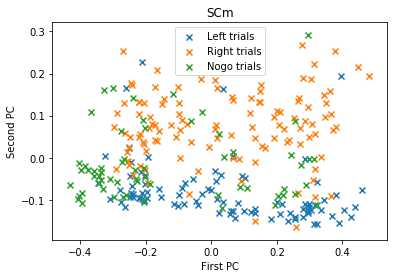

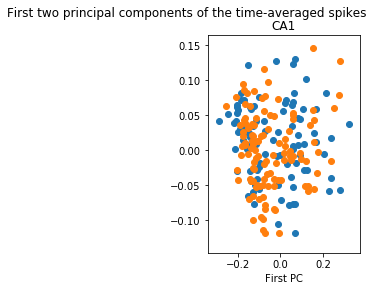

In [32]:
# proj_X = compute_pca('SCm', average=False).reshape(2, spks.shape[1], spks.shape[2])
# left_resp = proj_X[:, dat['response'] == 1]
# right_resp = proj_X[:, dat['response'] == -1]

# # print(left_resp.shape)
# left_resp = left_resp[:,0]
# right_resp = right_resp[:,0]

# plt.subplot(1, 2, 1)
# plt.plot(left_resp[0], left_resp[1], '.-', label="Left trials")
# # plt.scatter(right_resp[0], right_resp[1], label="Right trials")
# plt.legend()

proj_X,_ = compute_pca('SCm')

left_resp = proj_X[dat['response'] == 1]
right_resp = proj_X[dat['response'] == -1]
nogo_resp = proj_X[dat['response'] == 0]

plt.scatter(left_resp[:,0], left_resp[:,1], label="Left trials", marker="x")
plt.scatter(right_resp[:,0], right_resp[:,1], label="Right trials", marker="x")
plt.scatter(nogo_resp[:,0], nogo_resp[:,1], label="Nogo trials", marker="x")

plt.title("SCm")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
proj_X,_ = compute_pca('CA1')
left_resp = proj_X[dat['response'] == 1]
right_resp = proj_X[dat['response'] == -1]

plt.scatter(left_resp[:,0], left_resp[:,1])
plt.scatter(right_resp[:,0], right_resp[:,1])
plt.title("CA1")
plt.xlabel("First PC")

plt.suptitle("First two principal components of the time-averaged spikes")
plt.show()


We can observe that the trial-averaged activity of the neurons in SCm correlates with the response type of the animal. What does the first PC capture ? 